AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [2]:
import pandas as pd

file_path = 'diabetic_data.csv'
data = pd.read_csv(file_path)

variance_num_med_proc = data['num_med_proc'].var()
std_dev_num_med_proc = data['num_med_proc'].std()

covariance = data[['num_med_proc', 'time_in_hospital']].cov().iloc[0, 1]
correlation = data[['num_med_proc', 'time_in_hospital']].corr().iloc[0, 1]

print(variance_num_med_proc, std_dev_num_med_proc, covariance, correlation)

556.7456310006736 23.595457846811822 30.983682424578394 0.4396152794861987


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

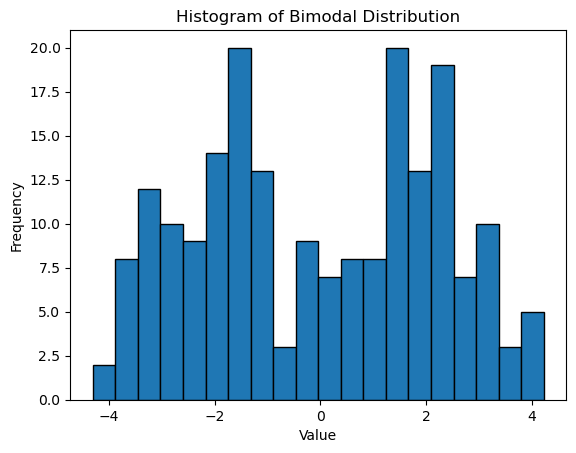

Kurtosis: -1.253171130450326
Skewness: -0.016303987867885825


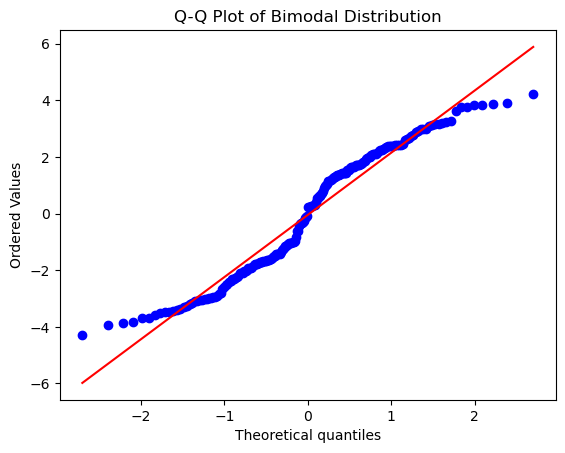

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)
data1 = np.random.normal(2, 1.2, 100)
data2 = np.random.normal(-2, 1.2, 100)
bimodal_data = np.concatenate((data1, data2))

plt.hist(bimodal_data, bins=20, edgecolor='black')
plt.title('Histogram of Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

kurt = kurtosis(bimodal_data)
skewness = skew(bimodal_data)

print(f'Kurtosis: {kurt}')
print(f'Skewness: {skewness}')

stats.probplot(bimodal_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Bimodal Distribution')
plt.show()

AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

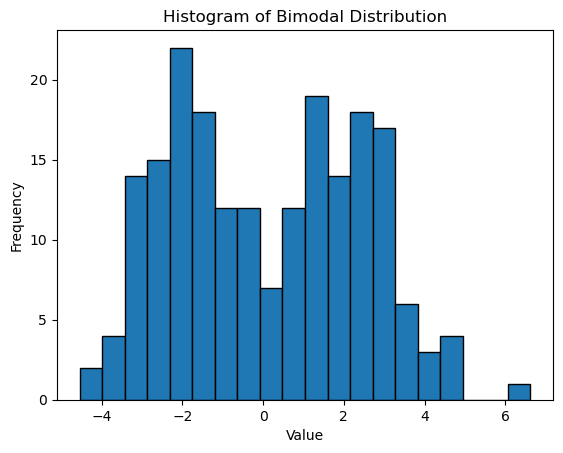

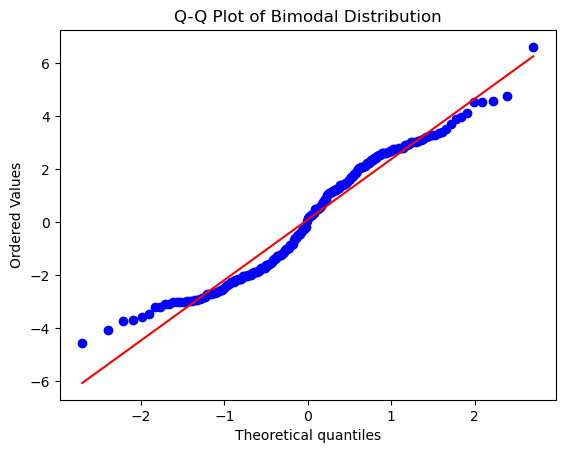

Shapiro-Wilk Test Statistic: 0.9606351852416992, p-value: 2.3184005840448663e-05
The data does not appear to be normally distributed (Shapiro-Wilk test).
Anderson-Darling Test Statistic: 2.991047559803178
The data does not appear to be normally distributed at the 15.0% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 10.0% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 5.0% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 2.5% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 1.0% significance level (Anderson-Darling test).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, kurtosis, skew
import scipy.stats as stats

data1 = np.random.normal(2, 1.2, 100)
data2 = np.random.normal(-2, 1.2, 100)
bimodal_data = np.concatenate((data1, data2))

plt.hist(bimodal_data, bins=20, edgecolor='black')
plt.title('Histogram of Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

stats.probplot(bimodal_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Bimodal Distribution')
plt.show()

shapiro_test = shapiro(bimodal_data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')
if shapiro_test.pvalue > 0.05:
    print("The data appears to be normally distributed (Shapiro-Wilk test).")
else:
    print("The data does not appear to be normally distributed (Shapiro-Wilk test).")

anderson_test = anderson(bimodal_data, dist='norm')
print(f'Anderson-Darling Test Statistic: {anderson_test.statistic}')
for i in range(len(anderson_test.critical_values)):
    significance_level = anderson_test.significance_level[i]
    critical_value = anderson_test.critical_values[i]
    if anderson_test.statistic < critical_value:
        print(f"The data appears to be normally distributed at the {significance_level}% significance level (Anderson-Darling test).")
    else:
        print(f"The data does not appear to be normally distributed at the {significance_level}% significance level (Anderson-Darling test).")

AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

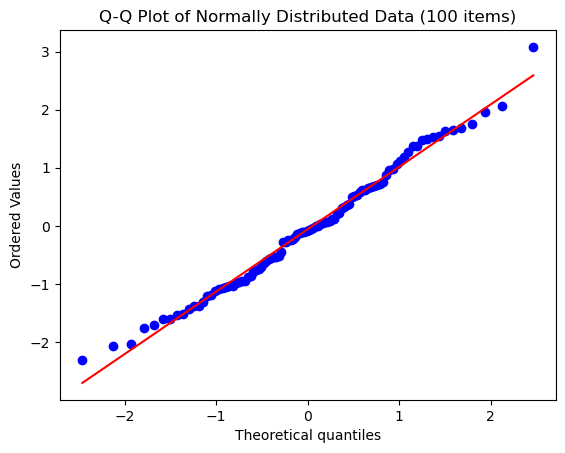

Shapiro-Wilk Test Statistic (100 items): 0.9885545969009399, p-value: 0.5499540567398071
The data appears to be normally distributed (Shapiro-Wilk test, 100 items).
Anderson-Darling Test Statistic (100 items): 0.305524553735566
The data appears to be normally distributed at the 15.0% significance level (Anderson-Darling test, 100 items).
The data appears to be normally distributed at the 10.0% significance level (Anderson-Darling test, 100 items).
The data appears to be normally distributed at the 5.0% significance level (Anderson-Darling test, 100 items).
The data appears to be normally distributed at the 2.5% significance level (Anderson-Darling test, 100 items).
The data appears to be normally distributed at the 1.0% significance level (Anderson-Darling test, 100 items).


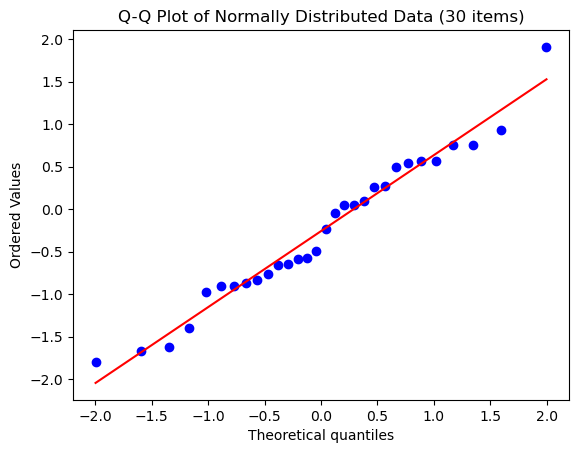

Shapiro-Wilk Test Statistic (30 items): 0.9715980291366577, p-value: 0.5837664008140564
The data appears to be normally distributed (Shapiro-Wilk test, 30 items).
Anderson-Darling Test Statistic (30 items): 0.32144793642510194
The data appears to be normally distributed at the 15.0% significance level (Anderson-Darling test, 30 items).
The data appears to be normally distributed at the 10.0% significance level (Anderson-Darling test, 30 items).
The data appears to be normally distributed at the 5.0% significance level (Anderson-Darling test, 30 items).
The data appears to be normally distributed at the 2.5% significance level (Anderson-Darling test, 30 items).
The data appears to be normally distributed at the 1.0% significance level (Anderson-Darling test, 30 items).


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson
import scipy.stats as stats

normal_data_100 = np.random.normal(0, 1, 100)

stats.probplot(normal_data_100, dist="norm", plot=plt)
plt.title('Q-Q Plot of Normally Distributed Data (100 items)')
plt.show()

shapiro_test_100 = shapiro(normal_data_100)
print(f'Shapiro-Wilk Test Statistic (100 items): {shapiro_test_100.statistic}, p-value: {shapiro_test_100.pvalue}')
if shapiro_test_100.pvalue > 0.05:
    print("The data appears to be normally distributed (Shapiro-Wilk test, 100 items).")
else:
    print("The data does not appear to be normally distributed (Shapiro-Wilk test, 100 items).")

anderson_test_100 = anderson(normal_data_100, dist='norm')
print(f'Anderson-Darling Test Statistic (100 items): {anderson_test_100.statistic}')
for i in range(len(anderson_test_100.critical_values)):
    significance_level = anderson_test_100.significance_level[i]
    critical_value = anderson_test_100.critical_values[i]
    if anderson_test_100.statistic < critical_value:
        print(f"The data appears to be normally distributed at the {significance_level}% significance level (Anderson-Darling test, 100 items).")
    else:
        print(f"The data does not appear to be normally distributed at the {significance_level}% significance level (Anderson-Darling test, 100 items).")

normal_data_30 = np.random.normal(0, 1, 30)

stats.probplot(normal_data_30, dist="norm", plot=plt)
plt.title('Q-Q Plot of Normally Distributed Data (30 items)')
plt.show()

shapiro_test_30 = shapiro(normal_data_30)
print(f'Shapiro-Wilk Test Statistic (30 items): {shapiro_test_30.statistic}, p-value: {shapiro_test_30.pvalue}')
if shapiro_test_30.pvalue > 0.05:
    print("The data appears to be normally distributed (Shapiro-Wilk test, 30 items).")
else:
    print("The data does not appear to be normally distributed (Shapiro-Wilk test, 30 items).")

anderson_test_30 = anderson(normal_data_30, dist='norm')
print(f'Anderson-Darling Test Statistic (30 items): {anderson_test_30.statistic}')
for i in range(len(anderson_test_30.critical_values)):
    significance_level = anderson_test_30.significance_level[i]
    critical_value = anderson_test_30.critical_values[i]
    if anderson_test_30.statistic < critical_value:
        print(f"The data appears to be normally distributed at the {significance_level}% significance level (Anderson-Darling test, 30 items).")
    else:
        print(f"The data does not appear to be normally distributed at the {significance_level}% significance level (Anderson-Darling test, 30 items).")

AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

Unique values under race column: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


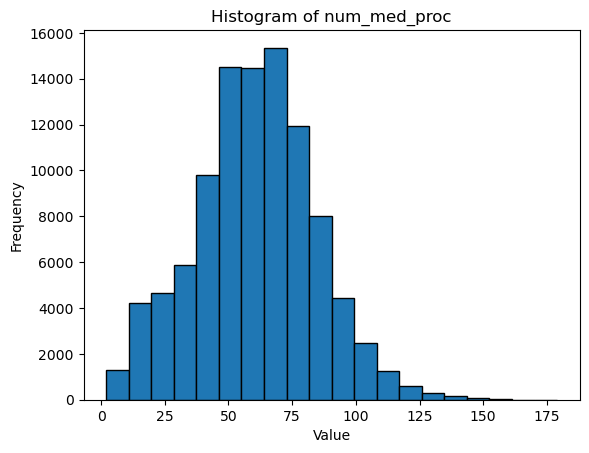

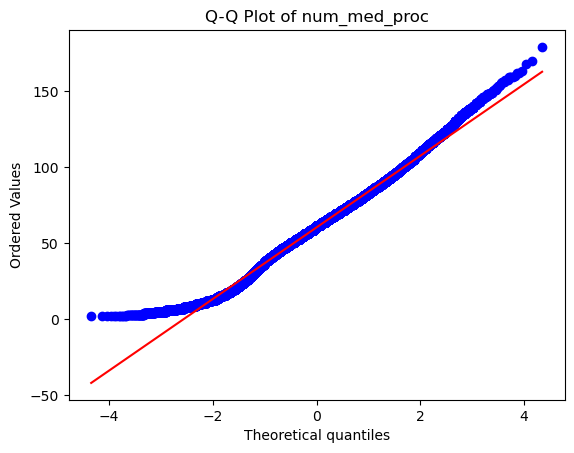

Anderson-Darling Test Statistic: 96.61245024697564
The data does not appear to be normally distributed at the 15.0% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 10.0% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 5.0% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 2.5% significance level (Anderson-Darling test).
The data does not appear to be normally distributed at the 1.0% significance level (Anderson-Darling test).


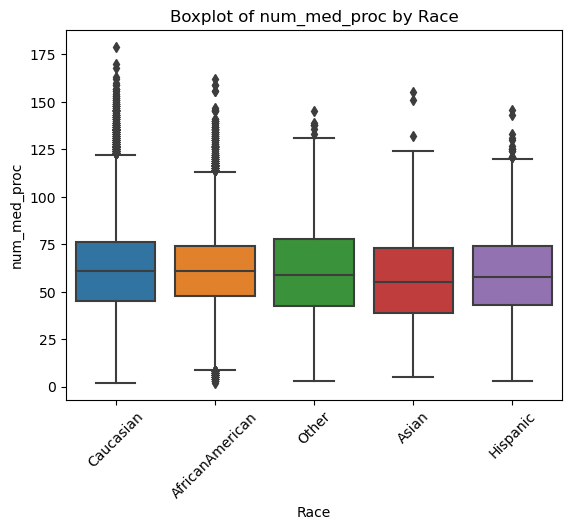

ANOVA Test Statistic: 12.454717826440142, p-value: 3.9621065489336674e-10
Reject the null hypothesis. At least one of the means of num_med_proc for different race categories is different.
Kruskal-Wallis Test Statistic: 52.17798202426288, p-value: 1.2661582646035497e-10
Reject the null hypothesis. At least one of the distributions of num_med_proc for different race categories is different (Kruskal-Wallis test).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, f_oneway, kruskal
import seaborn as sns


data = pd.read_csv('diabetic_data.csv')


unique_races = data['race'].unique()
print(f'Unique values under race column: {unique_races}')


plt.hist(data['num_med_proc'], bins=20, edgecolor='black')
plt.title('Histogram of num_med_proc')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

stats.probplot(data['num_med_proc'], dist="norm", plot=plt)
plt.title('Q-Q Plot of num_med_proc')
plt.show()

anderson_test = anderson(data['num_med_proc'], dist='norm')
print(f'Anderson-Darling Test Statistic: {anderson_test.statistic}')
for i in range(len(anderson_test.critical_values)):
    significance_level = anderson_test.significance_level[i]
    critical_value = anderson_test.critical_values[i]
    if anderson_test.statistic < critical_value:
        print(f"The data appears to be normally distributed at the {significance_level}% significance level (Anderson-Darling test).")
    else:
        print(f"The data does not appear to be normally distributed at the {significance_level}% significance level (Anderson-Darling test).")

sns.boxplot(x='race', y='num_med_proc', data=data)
plt.title('Boxplot of num_med_proc by Race')
plt.xlabel('Race')
plt.ylabel('num_med_proc')
plt.xticks(rotation=45)
plt.show()


anova_groups = [data['num_med_proc'][data['race'] == race] for race in unique_races]
anova_result = f_oneway(*anova_groups)
print(f'ANOVA Test Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')
if anova_result.pvalue > 0.05:
    print("Fail to reject the null hypothesis. The means of num_med_proc for different race categories are equal.")
else:
    print("Reject the null hypothesis. At least one of the means of num_med_proc for different race categories is different.")

kruskal_result = kruskal(*anova_groups)
print(f'Kruskal-Wallis Test Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}')
if kruskal_result.pvalue > 0.05:
    print("Fail to reject the null hypothesis. The distributions of num_med_proc for different race categories are equal (Kruskal-Wallis test).")
else:
    print("Reject the null hypothesis. At least one of the distributions of num_med_proc for different race categories is different (Kruskal-Wallis test).")